# A quick introduction to machine learning

**Author:** [Leonardo Uieda](https://www.leouieda.com/)
    
This notebook is meant as a very brief hands-on introduction to machine learning. It will cover some of the common nomenclature, principles, and applications. It's designed to be taught as a 1-2 hour session with live-coding.

## 🧑🏿‍💻 • Learner profile

* Is currently in their final year of a STEM undergraduate degree or early years of a postgraduate degree.
* Has studies the basics of statistics, Python programming, and linear algebra.
* Is interested in using machine learning in their projects or as a future career.

## 📖 • What is ML?

Some features of machine learning (from my personal point of view):

* Focus on practical problems
* Learning from data and making predictions
* Overlap with statistics and optimization
* Computational approach

**Oversimplified summary:** Fit a mathematical model to data and use it to make predictions.

## 🗺️ • Glossary 

<dl>
    <dt>model</dt>
    <dd>Mathematical formula used to approximate the data</dd>
    <dt>parameters</dt>
    <dd>Variables that define the model and control its behavior</dd>
    <dt>labels/classes</dt>
    <dd>Quantity/category that we want to predict</dd>
    <dt>features</dt>
    <dd>Measurements (information) used as predictors of labels/classes</dd>
    <dt>training</dt>
    <dd>Using features and known labels/classes to fit the model (estimate its parameters)</dd>
    <dt>hyper-parameters</dt>
    <dd>Variables that influence the training and the model but are not estimated during training</dd>
    <dt>unsupervised learning</dt>
    <dd>Extract information and structure from the data without "training". Examples: clustering, principal component analysis.</dd>
    <dt>supervised learning</dt>
    <dd>Fit a model using data to "train" it for making predictions. Examples: regression, classification, spam detection, recommendation systems</dd>
</dl>


**Disclaimer:** I'm not an ML researcher. Don't quote me on this.

## 🐍 • Libraries

In Python, the main tool used for machine learning is [scikit-learn](https://scikit-learn.org/). We'll use it and some of the other scientific Python *stack* to play with some data as we work through the core principles of machine learning.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors, decomposition, cluster

## 🐧 • Data

For this tutorial, we'll use one of the sample datasets from the [seaborn](https://seaborn.pydata.org/) library. It contains measurements of anatomical features of 3 different species of penguin collected [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

The data are distributed under a [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/) license from the GitHub repository [allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins). The data were originally published in [Gorman et al. (2014)](https://doi.org/10.1371/journal.pone.0090081).

In [2]:
data = sns.load_dataset("penguins")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The seaborn function returns the data in a `pandas.DataFrame`, which would be standard way to load data stored in CSV files or Excell spreadsheets. Each row contains information about an individual and each column is a type of observation.

> **Example of good practice:** Notice how each numerical column name includes the unit! This is a great example and your future self will be very grateful if you replicate this for your own data. As a bonus, also use all lowercase characters and underscores `_` instead of spaces or dashes `-`.

<figure>
    <img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png" alt="Illustration of the penguin beak measurements.">
    <figcaption>
        <strong>Figure:</strong> Illustration of the penguin beak measurements.
        Artwork by <a href="https://github.com/allisonhorst">@allison_horst</a>.
    </figcaption>
</figure> 

### Goal

Give the data that we have, let's set ourselves the following goal:
**predict the species from the anatomical measurements.**

Since the species is a category and not a continuous variable, we're dealing with a **classification problem** and not a regression problem. This is important to know since it will guide the models and methods that we use and research.

### Cleaning

Data cleaning and inspection is probably the most crucial part of a machine learning workflow. Without first having sufficient, good, standardized, and cleaned data there is no algorithm that will solve your problems.

The first thing to note is that our data has missing values. Some of the rows don't have all of the information for all features. This can cause a lot of problems in our processing and machine learning pipelines. So let's first see how many there are and which values are missing. 

In [3]:
data[np.any(data.isna(), axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's not that many and most are in the `sex` column, which we won't use here. So let's first drop that entire column from our dataset.

In [4]:
data.drop("sex", axis=1, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [5]:
data.dropna(axis=0, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


Now the problem is that the index doesn't match the number of rows in our table (notice that the last row is 343 when we only have 342 rows). This happens because `pandas` deletes rows but keeps the original index numbers intact (which is a sensible default). 

Let's re-align the index with the number of rows.

In [6]:
data.reset_index(drop=True, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


Now we have data that has no missing values and we're ready to start.

### Visualize

Now that we have clean and ordered data, it's important to visualize the data so that we know what we're dealing with. For this dataset, we have few enough features (columns) and samples (rows) to visualize it straight away. Otherwise, we should apply some sort of [dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) first.

A standard way to plot the different features and the pair-wise relationship between then is with a "pair plot". Thankfully, we don't have to create these ourselves with `matplotlib` since `seaborn` has a function just for this.

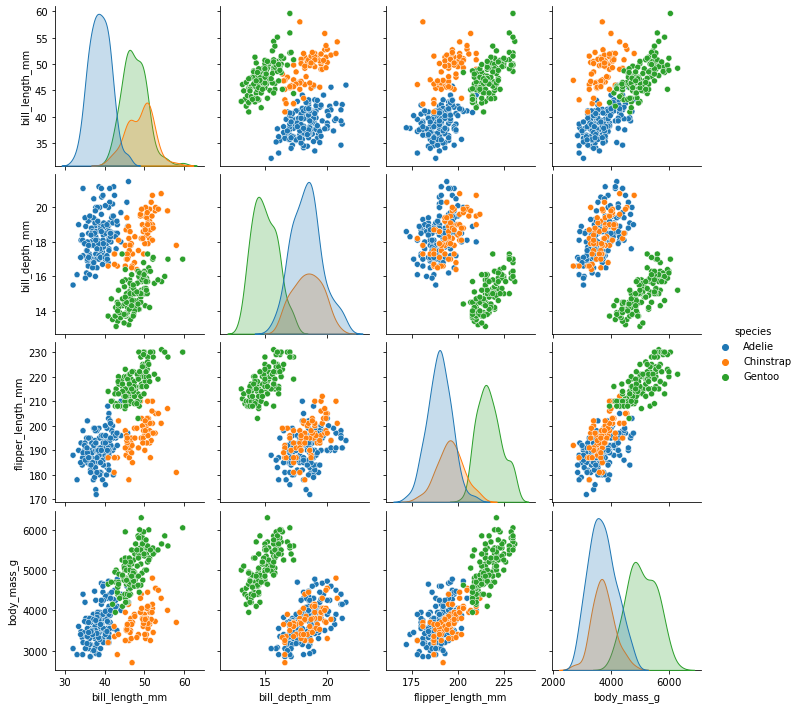

In [7]:
sns.pairplot(data, hue="species")

In the figure above, each graph is a cross-plot of 2 different numerical columns in our dataset. The diagonal in the middle is the estimated distribution of that numerical column. Each plot is colored by the respective species.

What we can see from this is that some features are highly correlated for some species. For example, body mass and flipper length or flipper length and and bill depth (for Chinstrap and Adelie). Notice also how the distributions overlap heavily but the overlap isn't always the same. For example, the body mass of Adelie and Chinstrap penguins overlap but not their bill length.

**If all features were correlated and overlapping, we'd have very little chance of differentiating between the different classes** (species) using them and our machine learning pipeline would halt here. It would indicated that we probably need to gather data from a different feature.

Since that's not the case, let's move on and see what we can do.

### Format

Scikit-learn and a lot of other Python libraries for machine learning (which largely try to emulate scikit-learn), require the data to be formatted in a certain way before it can be used. 

**Features:** The observations that we will use as predictors of the species. These need to be stored in a 2D array (basically a matrix). Each **row** of this matrix is a **sample** (in our case the measurements of an individual) and each **column** corresponds to a different **feature**. This matrix is often called `X` in the scikit-learn documentation.

We can make the feature matrix `X` from our `pandas.DataFrame` by selecting the columns and getting the `.values` attribute (which returns the data in a `DataFrame` as a 2D array).

In [8]:
feature_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = data[feature_columns].values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

This is another example of why getting the data sorted into a standard format early is important. Making the feature matrix would be difficult to do if we hadn't done that previously.

**Labels/classes:** The thing that we are trying to predict from our features. In our case, we have labels for each sample in our dataset (the `species` column). The labels must be stored in a 1D array (can be 2D depending on the application). In the scikit-learn documentation this is often called `y`.

In [9]:
y = data.species.values
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

That we have our `X` and `y` variables, we can start trying to learn from the data with scikit-learn.

## 🔭 • Unsupervised learning: Finding patterns in the data

Sometimes we may have a bunch of features but no labels already present in the data. Without them, we can't train our models to predict the labels from the features. But that doesn't mean that there is nothing we can do.

Unsupervised learning methods are all about finding patterns in the data without first training a model with given labels. An example of this is [**clustering**](https://scikit-learn.org/stable/modules/clustering.html), which tries to categorize the data based on how much they group around each other. 

From our pair-plot above, we can see that the 3 species tend to be clustered around certain ranges of values depending on the features. There is more or less overlap between species depending on the features used so we can expect that clustering methods may struggle a bit to separate them. 

Let's see what the simplest form of clustering ([K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means)) can do. We need to tell it the number of clusters to look. Thankfully, we already know that there are only 3 possible species.

In [11]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,

The prediction output is a value of 0, 1, or 2 indicating to which cluster each data sample belongs. We don't know which one corresponds to which species (if any) but we can do a visual inspection to check the performance. 

To do so, we can assign the k-means labels as a column in our `data` variable and use it to create a new pair-plot.

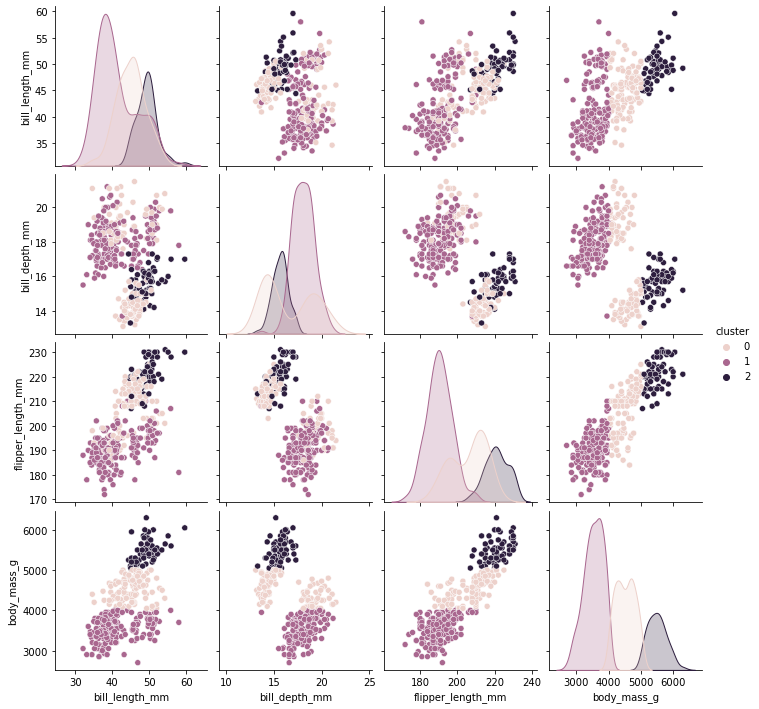

In [13]:
data = data.assign(cluster=cluster_labels)

sns.pairplot(data, hue="cluster")

> **Pro tip:** Open a "New view for notebook" in the JupyterLab "File" menu to place the original pair-plot and our k-means prediction side by side for comparison.

The clustering doesn't seem to have performed very well in the prediction of the labels. For one, it seems to have divided the body mass 3 ways into low, mid, and high values. 

I guess this means that k-means is not able to predict the species properly so we should move on to more complex and sophisticated models. 🤷

### The importance of scaling

🛑 **Stop!** 🛑

Before moving on, we should always try to **understand why the model failed** and **check if there is a problem with our data**. If our data are faulty or need some more cleaning, there is no amount of cleverness in model choice that will overcome that. As the saying goes:

> **Garbage in, garbage out.** 🗑️

Going back to our data, let's have a look at the statistics for each feature.

In [16]:
data[feature_columns].mean(axis=0)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [17]:
data[feature_columns].std(axis=0)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64

Notice that the body mass is 2 orders of magnitude larger in both mean and standard deviation than the bill measurements. That should raise some red flags since our clustering seems to have divided the data based on body mass alone. 

K-means calculates the clusters based on the distance between points and their "center", as defined by the mean of all their dimensions (features). And what we know about means is **large values will skew the mean towards them**. So it's no wonder that the clusters are being picked based on the body mass along.

What can we do to mitigate this? The standard practice, and an **underlying assumption for many machine learning methods**, is that all features have **zero mean and unit standard deviation** (in other words, are as close to normally distributed as possible).

The simplest possible method to resolve this is to subtract the mean and divide by the standard deviation for each feature. In scikit-learn, we can do this with the `StandardScaler`.

In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [19]:
X_scaled.mean(axis=0)

array([ 1.66208827e-16, -1.41277503e-15, -8.31044135e-16,  4.15522068e-17])

In [20]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

Now let's try the clustering again but with our scaled features.

In [21]:
kmeans.fit(X_scaled)
cluster_labels_scaled = kmeans.predict(X_scaled)
data = data.assign(cluster_scaled=cluster_labels_scaled)

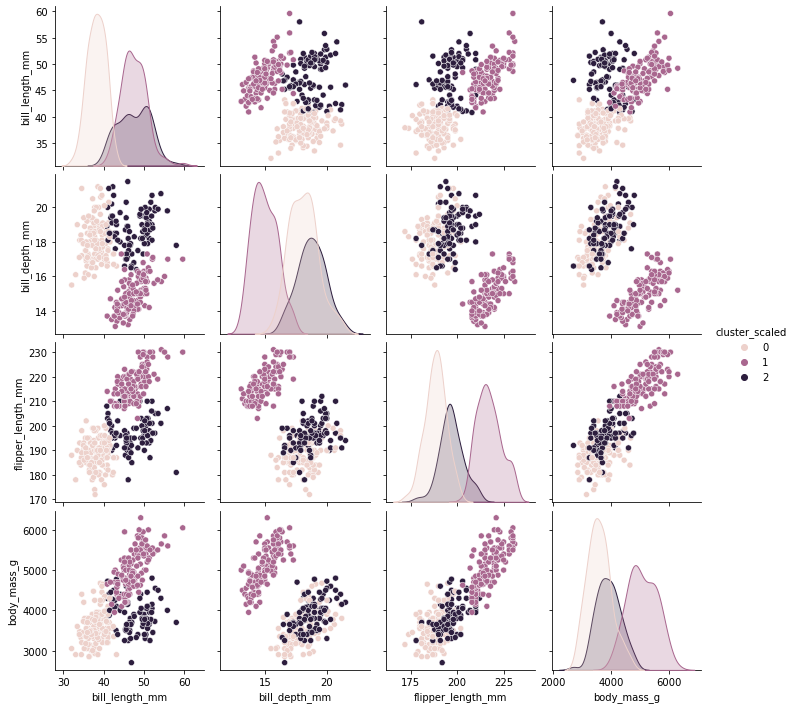

In [23]:
sns.pairplot(data, hue="cluster_scaled", vars=feature_columns)

Comparing these predicted cluster labels with our actual known species shows that **k-means is a decent method to predict species**. Of course, the clustering is not perfect and some samples are mislabeled. Let's see if we can do better with a supervised learning approach.

I can't stress this enough: 

> **Always start with the simplest model and check your data before moving to more complex models!**



## Supervised learning: Training models for prediction

Train a model on our data for classification. Maybe show how the behaviour is different when using PCA and not.

In [ ]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)

## Validation: How good are our predictions?

Talk about validation and cross-validation.

## Summary

Summarize the main take home messages.

## Further reading

What to look into for the future.

Feature selection and standardization.

Transform videos.

Scikit-learn docs

Jake's video tutorial.

---

## License

> This work is based on this excelled tutorial by Jake VanderPlas: https://github.com/jakevdp/sklearn_tutorial

All Python source code is made available under the BSD 3-clause license. You
can freely use and modify the code, without warranty, so long as you provide
attribution to the authors.

Unless otherwise specified, all figures and Jupyter notebooks are available
under the Creative Commons Attribution 4.0 License (CC-BY).

The full text of these licenses is provided in the [`LICENSE.txt`](LICENSE.txt)
file.